### 0. Leer los datos

#### Librerías

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

##### Carga de datos

Utlizo el dataset de Airbnb filtrado por Madrid con 14780 entradas.

In [2]:
airbnb_extract = pd.read_csv('airbnb-listings-extract.csv', sep= ';', decimal='.')
airbnb_extract

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,2098030,https://www.airbnb.com/rooms/2098030,20170502132028,2017-05-02,Spring into Bed Stuy!,"Sometimes I rent as a host (I'm here, guest st...","Simple, clean, modern one-bedroom in beautiful...","Sometimes I rent as a host (I'm here, guest st...",none,"There are plenty of restaurants, bars and othe...",...,10.0,9.0,10.0,NaN,NaN,strict,1.0,0.74,"40.67894535,-73.9393421856","Host Is Superhost,Host Has Profile Pic,Host Id..."
14776,17989442,https://www.airbnb.com/rooms/17989442,20170404145355,2017-04-06,"Paris 15 - Chambre cosy , near Eiffel tower",Paris- 15 -Résidence privée(code & gardien). Q...,"J'ai vécu au Canada, à Londres ,Madrid J'ai v...",Paris- 15 -Résidence privée(code & gardien). Q...,none,Quartier agréable par son côté résidentiel et ...,...,NaN,NaN,NaN,NaN,Paris,flexible,1.0,NaN,"48.8361969404,2.29404476423","Host Has Profile Pic,Is Location Exact,Instant..."
14777,13278634,https://www.airbnb.com/rooms/13278634,20170404145355,2017-04-05,Cozy Appartment Paris Batignolles,Cozy 2 bedroom apartment in core of Batignoles...,Very functional apartment in one of the most c...,Very functional apartment in one of the most c...,none,One of the most beautiful neighborhoods in Par...,...,10.0,10.0,10.0,NaN,NaN,strict,1.0,2.63,"48.8888092157,2.31617315267","Host Is Superhost,Host Has Profile Pic,Host Id..."
14778,10733941,https://www.airbnb.com/rooms/10733941,20160516142622,2016-05-18,City Pa

### 1.Preparación de los datos

#### Filtro y me quedo con los datos de Madrid

In [3]:
print(f'Hay', (airbnb_extract['City'] != 'Madrid').sum(), 'filas que no son de Madrid')

Hay 1573 filas que no son de Madrid


In [4]:
airbnb_Madrid = airbnb_extract.loc[airbnb_extract['City']=='Madrid']

#### Divido los datos entre train y test:

In [5]:
train, test = train_test_split(airbnb_extract, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


Guardo los CSV train y test:

In [6]:
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

#### Cargo el dataset 'train.csv' con el que voy a trabajar:

In [7]:
airbnb_train = pd.read_csv('./train.csv', sep=';', decimal='.')
airbnb_train

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,17899022,https://www.airbnb.com/rooms/17899022,20170407214119,2017-04-08,Home from home in downtown Madrid,We have a cozy and comfy apartment in Madrid's...,The flat is located in the 3rd floor of a rece...,We have a cozy and comfy apartment in Madrid's...,none,Argüelles is a great neighbourhood right in th...,...,NaN,NaN,NaN,NaN,NaN,moderate,1.0,NaN,"40.4305590083,-3.7171074457","Host Has Profile Pic,Host Identity Verified,Is..."
11820,5903209,https://www.airbnb.com/rooms/5903209,20170407214119,2017-04-08,Nice and comfortable apartment,"The good floor area, well connected, within 20...","The floor is open, welcoming and bright in the...","The good floor area, well connected, within 20...",none,"The property is located in the city of Madrid,...",...,10.0,9.0,9.0,VT 1963,NaN,strict,1.0,2.92,"40.3911261058,-3.75406768995","Host Has Profile Pic,Host Identity Verified,Is..."
11821,12306118,https://www.airbnb.com/rooms/12306118,20170407214119,2017-04-08,MADRID CENTER MODERN APT RIGHT NXT TO ROYAL PA...,In the heart of the Center of Madrid and next ...,Privilegiado piso lleno de detalles tanto para...,In the heart of the Center of Madrid and next ...,none,"A 1 minuto andando del Palacio Real, Catedral ...",...,10.0,10.0,10.0,NaN,NaN,strict,1.0,2.06,"40.416271007,-3.71309252937","Host Is Superhost,Host Has Profile Pic,Host Id..."
11822,15488731,https://www.airbnb.com/rooms/15488731,20170407214119,2017-04-08,Cozy Apartment in the middle of the Downtown- ...,The apartment is delicately decorated and has ...,"It is a space to be comfortable, with everythi...",The apartment is delicately decorated and has ...,none,Located in a super central and trendy place in...,...

### 2.Análisis exploratorio

Muestro las medidas del dataframe

In [8]:
airbnb_train.shape

(11824, 89)

Observo las primeas 6 filas, procuro ver todas las columnas y mirar su relevancia.

In [9]:
pd.options.display.max_columns = 90
airbnb_train.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,Facilitamos guía de eventos y rutas turísticas...,Excelente ubicación a tan solo 5 minutos andan...,La conexión a internet por fibra óptica 100 MB...,Recibimos personalmente a nuestros huéspedes y...,El apartamento se encuentra en un edificio res...,https://a0.muscache.com/im/pictures/74652419/f...,https://a0.muscache.com/im/pictures/74652419/f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/74652419/f...,31124866,https://www.airbnb.com/users/show/31124866,Inava,2015-04-13,"Arroyomolinos, Comunidad de Madrid, Spain",NaN,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/31124866/prof...,https://a0.muscache.com/im/users/31124866/prof...,Jerónimos,2.0,2.0,"email,phone,reviews,work_email","Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,60.0,550.0,1250.0,NaN,25.0,1,0,2,1125,2 weeks ago,NaN,9,32,52,117,2017-04-08,12,2015-04-26,2017-02-28,95.0,9.0,10.0,10.0,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",Hora llegada: a partir de las 15:00 horas Hora...,"Acceso a todos los medios de trasporte, BUS, M...",NaN,Estimado huésped estaremos disponible todo el ...,- Oír música con volumen moderado. Entrada a p...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/1565a3a9-2...,85301317,https://www.airbnb.com/users/show/85301317,Apartamentos Turísticos,2016-07-22,"Madrid, Community of Madrid, Spain",Somos una empresa de turismo dedicada al aloj...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/ff7ad016-4...,https://a0.muscache.com/im/pictures/ff7ad016-4...,NaN,1.0,1.0,"email,phone,reviews,jumio,offline_government_i...","Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,Madrid,Comunidad de Madrid,280

### 



Veo que hay columnas que no parecen tener mucha relevancia para el modelo, las elimino. Lo meto en otro df para no perder el original.

In [10]:
#airbnb_cl = airbnb_train[['City','Zipcode','Neighbourhood Cleansed', 'Neighbourhood Group Cleansed','Property Type','Room Type','Accommodates','Bathrooms','Bedrooms','Beds','Bed Type','Amenities','Square Feet','Price','Weekly Price','Monthly Price','Review Scores Rating', 'Number of Reviews']]
#airbnb_cl

airbnb_clean = airbnb_train.drop(['Neighbourhood','City','Zipcode','ID','Listing Url','Scrape ID','Last Scraped',
                                  'Name', 'Summary','Space','Description','Experiences Offered','Neighborhood Overview',
                                  'Notes','Amenities','Square Feet','Transit','Access' ,'Interaction', 'House Rules' ,
                                  'Thumbnail Url', 'Medium Url','Picture Url','XL Picture Url','Host ID', 'Host URL', 
                                  'Host Name', 'Host Since', 'Host Location', 'Host About','Host Response Time',
                                  'Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url', 
                                  'Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications',
                                  'Street','Neighbourhood Group Cleansed','State','Market','Smart Location','Country Code',
                                  'Country','Latitude','Longitude', 'Security Deposit','Cleaning Fee',
                                  'Minimum Nights','Maximum Nights','Calendar Updated','Has Availability','Availability 30',
                                  'Availability 60','Availability 90','Availability 365','Calendar last Scraped', 
                                  'First Review','Last Review','Review Scores Accuracy','Review Scores Cleanliness',
                                  'Review Scores Checkin','Weekly Price', 'Monthly Price','Review Scores Communication',
                                  'Review Scores Location','Review Scores Value','License','Jurisdiction Names',
                                  'Calculated host listings count','Reviews per Month','Geolocation','Features' ], axis=1)
airbnb_clean


,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Number of Reviews,Review Scores Rating,Cancellation Policy
0,Jerónimos,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,60.0,1,0,12,95.0,moderate
1,Sol,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,50.0,1,0,20,91.0,flexible
2,Vista Alegre,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,10.0,1,0,0,NaN,moderate
3,Embajadores,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,30.0,1,0,0,NaN,strict
4,Gaztambide,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,32.0,1,10,97,92.0,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,Argüelles,Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,52.0,1,0,0,NaN,moderate
11820,Aluche,Apartment,Entire home/apt,6,1.0,3.0,3.0,Real Bed,55.0,5,20,68,89.0,strict
11821,Palacio,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,69.0,2,40,24,94.0,strict
11822,Palacio,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,69.0,1,0,19,98.0,strict


In [11]:
airbnb_clean.columns=['Neighbourhood_Cleansed', 'Property_Type', 'Room_Type','Accommodates','Bathrooms', 
                      'Bedrooms', 'Beds', 'Bed_Type','Price','Guests_Included','Extra_People',
                      'Number_of_Reviews', 'Review_Scores_Rating','Cancellation_Policy']
airbnb_clean.head()

,Neighbourhood_Cleansed,Property_Type,Room_Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed_Type,Price,Guests_Included,Extra_People,Number_of_Reviews,Review_Scores_Rating,Cancellation_Policy
0,Jerónimos,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,60.0,1,0,12,95.0,moderate
1,Sol,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,50.0,1,0,20,91.0,flexible
2,Vista Alegre,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,10.0,1,0,0,NaN,moderate
3,Embajadores,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,30.0,1,0,0,NaN,strict
4,Gaztambide,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,32.0,1,10,97,92.0,strict


Muestro los datos estadísticos del df

In [12]:
airbnb_clean.describe()

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests_Included,Extra_People,Number_of_Reviews,Review_Scores_Rating
count,11824.000000,11780.000000,11804.00000,11787.000000,11809.000000,11824.000000,11824.000000,11824.000000,9163.000000
mean,3.277486,1.285229,1.34429,2.049122,73.712592,1.581614,7.637601,22.664834,91.628179
std,2.093973,0.664691,0.90518,1.623489,71.624844,1.160518,12.373491,38.092338,9.137614
min,1.000000,0.000000,0.00000,1.000000,9.000000,0.000000,0.000000,0.000000,20.000000
25%,2.000000,1.000000,1.00000,1.000000,34.000000,1.000000,0.000000,1.000000,89.000000
50%,3.000000,1.000000,1.00000,2.000000,55.000000,1.000000,0.000000,7.000000,94.000000
75%,4.000000,1.000000,2.00000,2.000000,87.000000,2.000000,15.000000,27.000000,98.000000
max,16.000000,8.000000,10.00000,16.000000,969.000000,16.000000,500.000000,356.000000,100.000000


Chequeo si hay valores nulos en alguna variable

In [13]:
airbnb_clean.isnull().any()

Neighbourhood_Cleansed    False
Property_Type             False
Room_Type                 False
Accommodates              False
Bathrooms                  True
Bedrooms                   True
Beds                       True
Bed_Type                  False
Price                      True
Guests_Included           False
Extra_People              False
Number_of_Reviews         False
Review_Scores_Rating       True
Cancellation_Policy       False
dtype: bool

### 3. Preprocesamiento

Miro cuantos valores nulos hay en cada variable

In [14]:
print(f'Bathrooms tiene: ',airbnb_clean['Bathrooms'].isnull().sum())
print(f'Bedrooms tiene: ', airbnb_clean['Bedrooms'].isnull().sum())
print(f'Beds tiene: ', airbnb_clean['Beds'].isnull().sum())
print(f'Price tiene: ', airbnb_clean['Price'].isnull().sum())
print(f'Review_Scores_Rating tiene: ', airbnb_clean['Review_Scores_Rating'].isnull().sum())


Bathrooms tiene:  44
Bedrooms tiene:  20
Beds tiene:  37
Price tiene:  15
Review_Scores_Rating tiene:  2661


In [15]:
#aqui eliminé square_feet

Miro tipos de datos de cada variable:

In [16]:
airbnb_clean.dtypes

Neighbourhood_Cleansed     object
Property_Type              object
Room_Type                  object
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Beds                      float64
Bed_Type                   object
Price                     float64
Guests_Included             int64
Extra_People                int64
Number_of_Reviews           int64
Review_Scores_Rating      float64
Cancellation_Policy        object
dtype: object

#### Codificación de variables categóricas

Ahora codifico las variables 'Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Bed Type' y 'Cancellation Policy'

In [17]:
#con MeanEncoder

categorical = ['Neighbourhood_Cleansed', 'Property_Type', 'Room_Type', 'Bed_Type','Cancellation_Policy']

mean_map = {}
for c in categorical:
    mean = airbnb_clean.groupby(c)['Price'].mean()
    airbnb_clean[c] = airbnb_clean[c].map(mean)    
    mean_map[c] = mean

# Si hubiera test, luego se haría:
#for c in categorical:
#    data_test[c] = data_test[c].map(mean_map[c])

airbnb_clean.head()

,Neighbourhood_Cleansed,Property_Type,Room_Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed_Type,Price,Guests_Included,Extra_People,Number_of_Reviews,Review_Scores_Rating,Cancellation_Policy
0,104.600000,72.294431,95.101560,4,1.0,1.0,2.0,74.080606,60.0,1,0,12,95.0,65.076832
1,85.710220,72.294431,95.101560,4,1.0,1.0,2.0,74.080606,50.0,1,0,20,91.0,64.194133
2,37.074074,72.294431,31.320988,1,1.5,1.0,8.0,74.080606,10.0,1,0,0,NaN,65.076832
3,60.707630,72.294431,40.894831,2,3.0,1.0,1.0,74.080606,30.0,1,0,0,NaN,86.974488
4,56.000000,72.294431,40.894831,2,1.0,1.0,1.0,74.080606,32.0,1,10,97,92.0,86.974488


In [18]:
#con labelEncoder sería:

#from sklearn.preprocessing import LabelEncoder

#le_Neighb = LabelEncoder()
#le_PropType = LabelEncoder()
#le_RoomType = LabelEncoder()
#le_BedType = LabelEncoder()
#le_CancelPolicy = LabelEncoder()

#airbnb_clean['Neighbourhood Cleansed']= le_Neighb.fit_transform(airbnb_clean['Neighbourhood Cleansed'])
#airbnb_clean['Property Type']= le_PropType.fit_transform(airbnb_clean['Property Type'])
#airbnb_clean['Room Type']= le_RoomType.fit_transform(airbnb_clean['Room Type'])
#airbnb_clean['Bed Type']= le_BedType.fit_transform(airbnb_clean['Bed Type'])
#airbnb_clean['Cancellation Policy']= le_CancelPolicy.fit_transform(airbnb_clean['Cancellation Policy'])

#airbnb_clean.head().T

Me aseguro de que los tipos de datos son todos numéricos, que no me falta hacer nada.

In [19]:
airbnb_clean.dtypes

Neighbourhood_Cleansed    float64
Property_Type             float64
Room_Type                 float64
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Beds                      float64
Bed_Type                  float64
Price                     float64
Guests_Included             int64
Extra_People                int64
Number_of_Reviews           int64
Review_Scores_Rating      float64
Cancellation_Policy       float64
dtype: object

##### Imputación de valores nulos

In [20]:
airbnb_clean.isnull().any()

Neighbourhood_Cleansed    False
Property_Type             False
Room_Type                 False
Accommodates              False
Bathrooms                  True
Bedrooms                   True
Beds                       True
Bed_Type                  False
Price                      True
Guests_Included           False
Extra_People              False
Number_of_Reviews         False
Review_Scores_Rating       True
Cancellation_Policy       False
dtype: bool

Imputo solo los valores de Bathrooms, Bedrooms, Beds y Review_Score_Rating. De Price voy a eliminar los nulos porque son 15 solo.

In [21]:
airbnb_clean["Bathrooms"].fillna(airbnb_clean["Bathrooms"].mode()[0], inplace=True)
airbnb_clean["Bedrooms"].fillna(airbnb_clean["Bedrooms"].mode()[0], inplace=True)
airbnb_clean["Beds"].fillna(airbnb_clean["Beds"].mode()[0], inplace=True)
airbnb_clean["Review_Scores_Rating"].fillna(airbnb_clean["Review_Scores_Rating"].mode()[0], inplace=True) 
airbnb_clean

,Neighbourhood_Cleansed,Property_Type,Room_Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed_Type,Price,Guests_Included,Extra_People,Number_of_Reviews,Review_Scores_Rating,Cancellation_Policy
0,104.600000,72.294431,95.101560,4,1.0,1.0,2.0,74.080606,60.0,1,0,12,95.0,65.076832
1,85.710220,72.294431,95.101560,4,1.0,1.0,2.0,74.080606,50.0,1,0,20,91.0,64.194133
2,37.074074,72.294431,31.320988,1,1.5,1.0,8.0,74.080606,10.0,1,0,0,100.0,65.076832
3,60.707630,72.294431,40.894831,2,3.0,1.0,1.0,74.080606,30.0,1,0,0,100.0,86.974488
4,56.000000,72.294431,40.894831,2,1.0,1.0,1.0,74.080606,32.0,1,10,97,92.0,86.974488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,65.097674,72.294431,95.101560,3,1.0,2.0,2.0,74.080606,52.0,1,0,0,100.0,65.076832
11820,29.114286,72.294431,95.101560,6,1.0,3.0,3.0,74.080606,55.0,5,20,68,89.0,86.974488
11821,77.329171,72.294431,95.101560,2,1.0,1.0,1.0,74.080606,69.0,2,40,24,94.0,86.974488
11822,77.329171,72.294431,95.101560,2,1.0,1.0,1.0,74.080606,69.0,1,0,19,98.0,86.974488


In [22]:
#como price tiene 15 nulos, me cargo esas filas.
airbnb_cl = airbnb_clean.dropna()
airbnb_cl

,Neighbourhood_Cleansed,Property_Type,Room_Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed_Type,Price,Guests_Included,Extra_People,Number_of_Reviews,Review_Scores_Rating,Cancellation_Policy
0,104.600000,72.294431,95.101560,4,1.0,1.0,2.0,74.080606,60.0,1,0,12,95.0,65.076832
1,85.710220,72.294431,95.101560,4,1.0,1.0,2.0,74.080606,50.0,1,0,20,91.0,64.194133
2,37.074074,72.294431,31.320988,1,1.5,1.0,8.0,74.080606,10.0,1,0,0,100.0,65.076832
3,60.707630,72.294431,40.894831,2,3.0,1.0,1.0,74.080606,30.0,1,0,0,100.0,86.974488
4,56.000000,72.294431,40.894831,2,1.0,1.0,1.0,74.080606,32.0,1,10,97,92.0,86.974488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,65.097674,72.294431,95.101560,3,1.0,2.0,2.0,74.080606,52.0,1,0,0,100.0,65.076832
11820,29.114286,72.294431,95.101560,6,1.0,3.0,3.0,74.080606,55.0,5,20,68,89.0,86.974488
11821,77.329171,72.294431,95.101560,2,1.0,1.0,1.0,74.080606,69.0,2,40,24,94.0,86.974488
11822,77.329171,72.294431,95.101560,2,1.0,1.0,1.0,74.080606,69.0,1,0,19,98.0,86.974488


#### Observación de outliers

Represento 3 variables en relación al precio

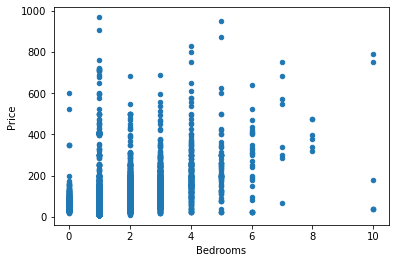

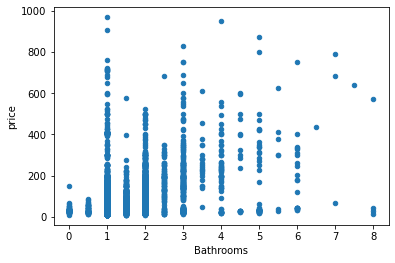

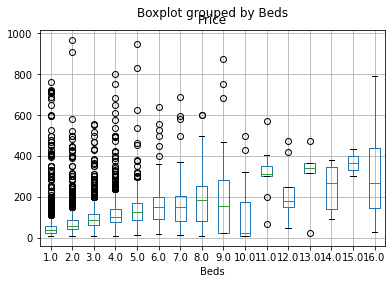

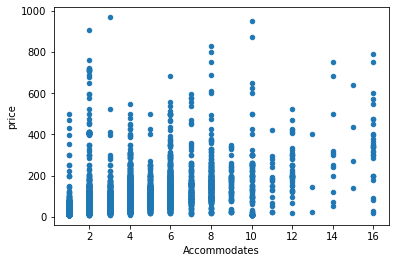

In [23]:
#scatter Bedrooms x Price
import matplotlib.pyplot as plt
airbnb_cl.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

#boxplot Bathrooms x Price
airbnb_cl.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('price')
plt.show()

#boxplot Beds x Price
airbnb_cl.boxplot(by='Beds',column = 'Price')
plt.show()

#boxplot Bathrooms x Price
airbnb_cl.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('price')
plt.show()


Cuento los valores únicos de cada una

In [24]:
airbnb_cl['Bedrooms'].value_counts()

1.0     7816
2.0     2084
0.0      814
3.0      732
4.0      240
5.0       74
6.0       29
7.0        8
8.0        6
10.0       6
Name: Bedrooms, dtype: int64

In [25]:
airbnb_cl['Bathrooms'].value_counts()

1.0    8889
2.0    1829
1.5     434
3.0     258
2.5      98
4.0      62
0.5      56
0.0      53
5.0      50
6.0      23
3.5      22
4.5      19
5.5       7
8.0       4
7.0       3
6.5       1
7.5       1
Name: Bathrooms, dtype: int64

In [26]:
airbnb_cl['Beds'].value_counts()

1.0     5896
2.0     3083
3.0     1315
4.0      735
5.0      316
6.0      188
7.0       83
8.0       76
10.0      42
9.0       32
16.0      12
11.0       9
12.0       9
14.0       6
13.0       5
15.0       2
Name: Beds, dtype: int64

In [27]:
airbnb_cl['Accommodates'].value_counts()

2     4227
4     2610
1     1634
3     1140
6      940
5      551
8      267
7      174
10      97
9       59
12      42
16      30
11      19
14      12
15       4
13       3
Name: Accommodates, dtype: int64

Voy a aplicar filtros para deshacerme de los outliers

In [28]:
airbnb_cl_filter = airbnb_cl[(airbnb_cl['Bedrooms'] > 0) & (airbnb_cl['Bedrooms'] < 7)]
airbnb_cl_filter2 = airbnb_cl_filter[(airbnb_cl_filter['Bathrooms'] > 0) & (airbnb_cl_filter['Bathrooms'] < 4.5)]
airbnb_cl_filter3 = airbnb_cl_filter2[(airbnb_cl_filter2['Beds'] > 0) & (airbnb_cl_filter2['Beds'] < 5)]
airbnb_cl_filter4 = airbnb_cl_filter2[(airbnb_cl_filter2['Accommodates'] > 1) & (airbnb_cl_filter2['Accommodates'] < 11)]

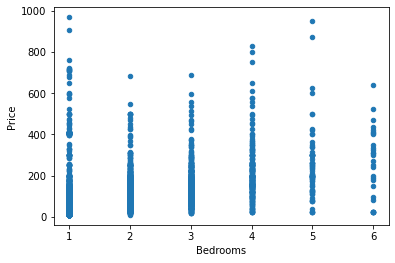

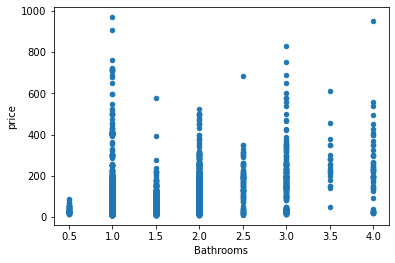

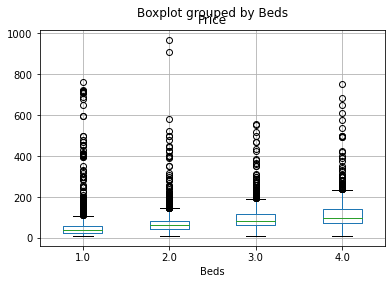

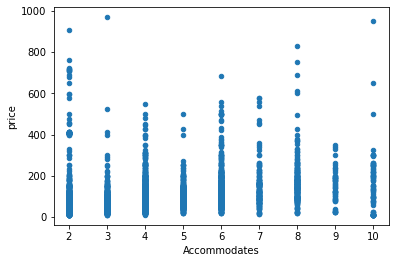

In [29]:
#scatter Bedrooms x Price sin outliers
import matplotlib.pyplot as plt
airbnb_cl_filter.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

#boxplot Bathrooms x Price sin outliers
airbnb_cl_filter2.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('price')
plt.show()

#boxplot Beds x Price sin outliers
airbnb_cl_filter3.boxplot(by='Beds',column = 'Price')
plt.show()

airbnb_cl_filter4.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('price')
plt.show()

#### Análisis de correlación

Matriz de correlación

In [30]:
airbnb_cl_filter4.corr().T

,Neighbourhood_Cleansed,Property_Type,Room_Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed_Type,Price,Guests_Included,Extra_People,Number_of_Reviews,Review_Scores_Rating,Cancellation_Policy
Neighbourhood_Cleansed,1.000000,0.144418,0.153285,0.194664,0.220547,0.199340,0.167171,0.013981,0.521345,0.062272,0.105675,-0.017237,0.062504,0.190576
Property_Type,0.144418,1.000000,0.069060,0.107550,0.142495,0.157305,0.110276,0.013488,0.149470,0.058225,-0.013788,-0.041252,0.040089,0.023661
Room_Type,0.153285,0.069060,1.000000,0.492010,0.055761,0.373149,0.318444,0.023767,0.330666,0.338769,0.047777,0.070232,-0.023949,0.138143
Accommodates,0.194664,0.107550,0.492010,1.000000,0.434677,0.749880,0.830334,0.044977,0.427913,0.523374,0.198633,0.022421,-0.066488,0.187263
Bathrooms,0.220547,0.142495,0.055761,0.434677,1.000000,0.534316,0.444832,0.035521,0.366640,0.207420,0.059476,-0.069989,0.042533,0.168689
Bedrooms,0.199340,0.157305,0.373149,0.749880,0.534316,1.000000,0.734024,0.046066,0.438574,0.399617,0.084818,-0.044376,-0.011228,0.130667
Beds,0.167171,0.110276,0.318444,0.830334,0.444832,0.734024,1.000000,0.052894,0.350134,0.399367,0.145236,0.002664,-0.059269,0.150016
Bed_Type,0.013981,0.013488,0.023767,0.044977,0.035521,0.046066,0.052894,1.000000,0.043953,0.022511,-0.020131,-0.002217,0.002640,0.010583
Price,0.521345,0.149470,0.330666,0.427913,0.366640,0.438574,0.350134,0.043953,1.000000,0.217789,0.061299,-0.086371,0.109018,0.138598
Guests_Included,0.062272,0.058225,0.338769,0.523374,0.207420,0.399617,0.399367,0.022511,0.217789,1.000000,0.349083,0.108639,-0.038204,0.134801


La representamos

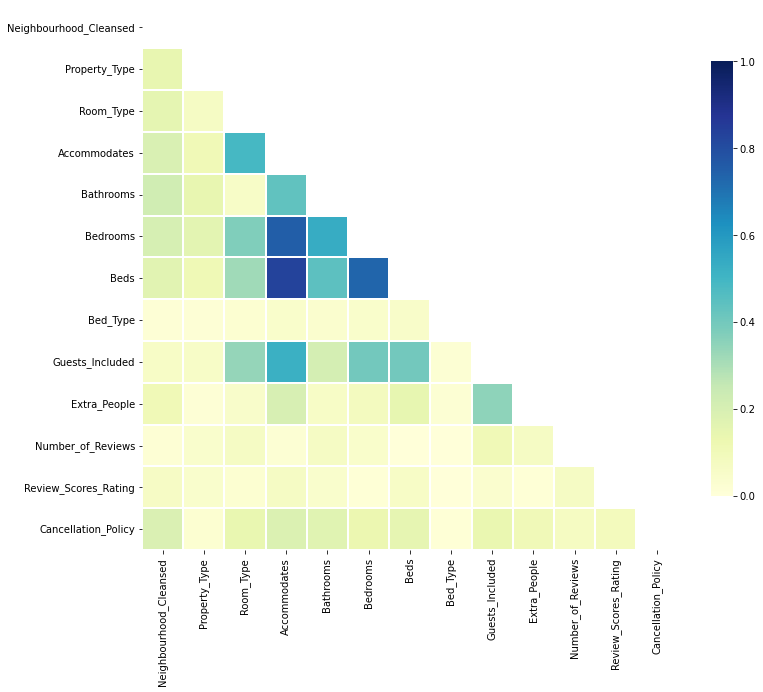

In [31]:
import numpy as np
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_cl_filter4.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Vemos que hay colinealidad en la variable Beds y Accommodates. Decido eliminar Beds porque tenía porcentaje de nulos mientras que Acommodates no.

In [32]:
airbnb_training= airbnb_cl_filter4.drop(['Beds'],axis=1)

### 4.Modelado

Primero dividiré los datos de train y luego haré lasso para ver si puedo eliminar variables.

Después de hacer lasso, vuelvo a este punto y elimino las variables que me ha excluido y que considero que tienen coef bajo:

In [33]:
airbnb_training= airbnb_training.drop(['Guests_Included', 'Cancellation_Policy','Bed_Type','Property_Type'],axis=1)
airbnb_training


,Neighbourhood_Cleansed,Room_Type,Accommodates,Bathrooms,Bedrooms,Price,Extra_People,Number_of_Reviews,Review_Scores_Rating
0,104.600000,95.101560,4,1.0,1.0,60.0,0,12,95.0
1,85.710220,95.101560,4,1.0,1.0,50.0,0,20,91.0
3,60.707630,40.894831,2,3.0,1.0,30.0,0,0,100.0
4,56.000000,40.894831,2,1.0,1.0,32.0,10,97,92.0
6,77.329171,95.101560,4,1.0,1.0,80.0,21,24,98.0
...,...,...,...,...,...,...,...,...,...
11818,71.400000,95.101560,2,1.0,2.0,50.0,15,0,100.0
11819,65.097674,95.101560,3,1.0,2.0,52.0,0,0,100.0
11820,29.114286,95.101560,6,1.0,3.0,55.0,20,68,89.0
11821,77.329171,95.101560,2,1.0,1.0,69.0,40,24,94.0


#### Dividimos entre x e y

In [34]:
features = airbnb_training.columns.drop(['Price']) #elijo la variable objetivo y la elimino del df
X_train = airbnb_training[features].values # aquí metemos todas las variables menos la objetivo
y_train = airbnb_training['Price'].values #la variable y será la variable objetivo Price

print('Filas, columnas', X_train.shape)
print('Filas, columnas', y_train.shape)

from sklearn import preprocessing
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

Filas, columnas (9181, 8)
Filas, columnas (9181,)


Utilizo Lasso para regularizar el modelo y extraer las variables que son buenas:

best mean cross-validation score: -2718.748
best parameters: {'alpha': 0.1}


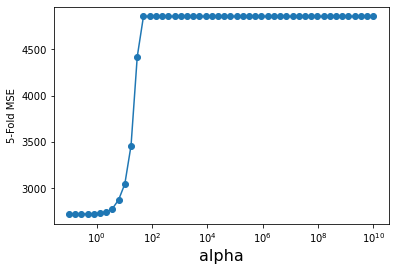

In [35]:
#Utilizo la validación cruzada para buscar el valor optimo de alpha:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [36]:
#aplico Lasso:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)


ytrainLasso = lasso.predict(XtrainScaled)
#ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
#mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
#print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
#print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(features,w):
    print(f,wi)


MSE Modelo Lasso (train): 2.71e+03
RMSE Modelo Lasso (train): 52
Neighbourhood_Cleansed 28.71544317900635
Room_Type 10.877261433678491
Accommodates 8.713114771447392
Bathrooms 9.350054545776624
Bedrooms 9.153000876991785
Extra_People -1.868304193392704
Number_of_Reviews -4.790328939091126
Review_Scores_Rating 5.903362120400904


##### Cargo los datos de Test para evaluar mi modelo:

In [37]:
airbnb_test = pd.read_csv('./test.csv', sep=';', decimal='.')
airbnb_test.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,14732416,https://www.airbnb.com/rooms/14732416,20170407214119,2017-04-08,Habitación privada en entorno tranquilo.,El edificio está junto a un maravilloso parque...,Me preocupo mucho de que el apartamento esté l...,El edificio está junto a un maravilloso parque...,none,"El barrio es multicultural, podrás encontrar q...","La casa no dispone de Aire Acondicionado, hay ...",Estamos muy bien comunicados con el centro de ...,"Puedes hacer uso del salón comedor, el baño y ...",Seguramente no siempre podré estar disponible ...,Es muy importante mantener las normas de la ca...,https://a0.muscache.com/im/pictures/e10f4577-e...,https://a0.muscache.com/im/pictures/e10f4577-e...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/e10f4577-e...,74851220,https://www.airbnb.com/users/show/74851220,Liverio,2016-05-30,"Madrid, Community of Madrid, Spain","Soy una persona con gustos sencillos, me gusta...",within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/81a1e59a-b...,https://a0.muscache.com/im/pictures/81a1e59a-b...,Villaverde,1.0,1.0,"email,phone,facebook,google,reviews,jumio,gove...","Villaverde, Madrid, Comunidad de Madrid 28021,...",Villaverde,Los Rosales,Villaverde,Madrid,Comunidad de Madrid,28021,Madrid,"Madrid, Spain",ES,Spain,40.346320,-3.691440,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Elevator in building,Buzz...",NaN,15.0,NaN,NaN,NaN,5.0,1,0,1,1125,3 days ago,NaN,7,16,46,46,2017-04-08,11,2016-09-13,2017-04-03,100.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,NaN,flexible,1.0,1.59,"40.3463197925,-3.69144006284","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,5302840,https://www.airbnb.com/rooms/5302840,20170407214119,2017-04-08,Habitación en calle Mayor,Es una habitación con entrada independiente. D...,La habitación está situada en un edificio de l...,Es una habitación con entrada independiente. D...,none,"La habitación está en la calle Mayor, en el ba...",NaN,"Metro ""Opera"" línea 2 y metro ""Sol"" con varias...",La habitación dispone de Wifi y aire acondicio...,Yo haré la entrada y la salida y dejaré mi tel...,No se permiten fumadores ni personas que viaje...,https://a0.muscache.com/im/pictures/66250209/6...,https://a0.muscache.com/im/pictures/66250209/6...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/66250209/6...,27461213,https://www.airbnb.com/users/show/27461213,Julián,2015-02-09,"Madrid, Community of Madrid, Spain","Persona viajera, que le gusta el buen comer...",within an hour,100.0,NaN,https://a0.muscache.com/im/users/27461213/prof...,https://a0.muscache.com/im/users/27461213/prof...,Palacio,3.0,3.0,"email,phone,reviews,jumio","Palacio, Madrid, Comunidad de Madrid 28013, Spain",

##### Aplico las mimas transformaciones que con train:

In [38]:
airbnb_test_clean = airbnb_test.drop(['Neighbourhood','City','Zipcode','ID','Listing Url','Scrape ID','Last Scraped',
                                  'Name', 'Summary','Space','Description','Experiences Offered','Neighborhood Overview',
                                  'Notes','Amenities','Square Feet','Transit','Access' ,'Interaction', 'House Rules' ,
                                  'Thumbnail Url', 'Medium Url','Picture Url','XL Picture Url','Host ID', 'Host URL', 
                                  'Host Name', 'Host Since', 'Host Location', 'Host About','Host Response Time',
                                  'Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url', 
                                  'Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications',
                                  'Street','Neighbourhood Group Cleansed','State','Market','Smart Location','Country Code',
                                  'Country','Latitude','Longitude', 'Security Deposit','Cleaning Fee',
                                  'Minimum Nights','Maximum Nights','Calendar Updated','Has Availability','Availability 30',
                                  'Availability 60','Availability 90','Availability 365','Calendar last Scraped', 
                                  'First Review','Last Review','Review Scores Accuracy','Review Scores Cleanliness',
                                  'Review Scores Checkin','Weekly Price', 'Monthly Price','Review Scores Communication',
                                  'Review Scores Location','Review Scores Value','License','Jurisdiction Names',
                                  'Calculated host listings count','Reviews per Month','Geolocation','Features' ], axis=1)

airbnb_test_clean.columns=['Neighbourhood_Cleansed', 'Property_Type', 'Room_Type','Accommodates','Bathrooms', 
                      'Bedrooms', 'Beds', 'Bed_Type','Price','Guests_Included','Extra_People',
                      'Number_of_Reviews', 'Review_Scores_Rating','Cancellation_Policy']
airbnb_test_clean.head()

,Neighbourhood_Cleansed,Property_Type,Room_Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed_Type,Price,Guests_Included,Extra_People,Number_of_Reviews,Review_Scores_Rating,Cancellation_Policy
0,Los Rosales,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,15.0,1,0,11,100.0,flexible
1,Palacio,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,25.0,1,0,17,96.0,moderate
2,Almagro,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,45.0,1,25,0,NaN,strict
3,Lucero,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,25.0,1,0,1,100.0,moderate
4,Embajadores,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,40.0,1,0,0,NaN,flexible


In [39]:
#Categorizo las variables

for c in categorical:
    airbnb_test_clean[c] = airbnb_test_clean[c].map(mean_map[c])
    
#imputación de valores nulos
airbnb_test_clean["Bathrooms"].fillna(airbnb_test_clean["Bathrooms"].mode()[0], inplace=True)
airbnb_test_clean["Bedrooms"].fillna(airbnb_test_clean["Bedrooms"].mode()[0], inplace=True)
airbnb_test_clean["Beds"].fillna(airbnb_test_clean["Beds"].mode()[0], inplace=True)
airbnb_test_clean["Review_Scores_Rating"].fillna(airbnb_test_clean["Review_Scores_Rating"].mode()[0], inplace=True) 

#miro si quedan nulos, por si al ser aleatoria la división ha caído alguno en otra variable

airbnb_test_clean.isnull().any()

Neighbourhood_Cleansed     True
Property_Type              True
Room_Type                 False
Accommodates              False
Bathrooms                 False
Bedrooms                  False
Beds                      False
Bed_Type                  False
Price                      True
Guests_Included           False
Extra_People              False
Number_of_Reviews         False
Review_Scores_Rating      False
Cancellation_Policy       False
dtype: bool

In [40]:
#imputo los que me faltan:
airbnb_test_clean["Neighbourhood_Cleansed"].fillna(airbnb_test_clean["Neighbourhood_Cleansed"].mode()[0], inplace=True)
airbnb_test_clean["Property_Type"].fillna(airbnb_test_clean["Property_Type"].mode()[0], inplace=True)

#elimino los nulos del df, solo quedan los de Price
airbnb_test_cl = airbnb_test_clean.dropna()
airbnb_test_cl

,Neighbourhood_Cleansed,Property_Type,Room_Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed_Type,Price,Guests_Included,Extra_People,Number_of_Reviews,Review_Scores_Rating,Cancellation_Policy
0,23.000000,72.294431,40.894831,1,1.0,1.0,1.0,74.080606,15.0,1,0,11,100.0,64.194133
1,77.329171,72.294431,40.894831,1,1.0,1.0,1.0,58.024876,25.0,1,0,17,96.0,65.076832
2,80.226891,72.294431,95.101560,2,1.0,1.0,1.0,74.080606,45.0,1,25,0,100.0,86.974488
3,30.638298,72.294431,40.894831,1,1.0,1.0,1.0,74.080606,25.0,1,0,1,100.0,65.076832
4,60.707630,72.294431,95.101560,3,1.0,0.0,2.0,74.080606,40.0,1,0,0,100.0,64.194133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,23.000000,95.556787,40.894831,1,1.0,1.0,1.0,74.080606,23.0,1,0,0,100.0,65.076832
2952,60.707630,72.294431,95.101560,2,1.0,1.0,1.0,74.080606,52.0,1,0,73,95.0,86.974488
2953,46.968750,72.294431,40.894831,1,1.0,1.0,1.0,74.080606,23.0,1,0,20,95.0,64.194133
2954,85.710220,95.556787,95.101560,5,1.5,3.0,3.0,74.080606,104.0,2,20,21,98.0,86.974488


In [41]:
#aplico los filtros 
airbnb_test_filter = airbnb_test_cl[(airbnb_cl['Bedrooms'] > 0 ) &( airbnb_test_cl['Bedrooms'] < 7)]
airbnb_test_filter2 = airbnb_test_filter[(airbnb_test_filter['Bathrooms'] > 0 ) & (airbnb_test_filter['Bathrooms'] < 4.5)]
airbnb_test_filter3 = airbnb_test_filter2[(airbnb_test_filter2['Beds'] > 0 ) & (airbnb_test_filter2['Beds'] < 5)]
airbnb_test_filter4 = airbnb_test_filter3[(airbnb_test_filter3['Accommodates'] > 1) & (airbnb_test_filter3['Accommodates'] < 11)]

#elimino Beds por la colinealidad 
airbnb_testing= airbnb_test_filter4.drop(['Beds'],axis=1)

#Elimino las variables que lasso deja casi a cero y a cero 
airbnb_testing= airbnb_testing.drop(['Guests_Included', 'Cancellation_Policy','Bed_Type','Property_Type'],axis=1)
airbnb_testing

,Neighbourhood_Cleansed,Room_Type,Accommodates,Bathrooms,Bedrooms,Price,Extra_People,Number_of_Reviews,Review_Scores_Rating
2,80.226891,95.101560,2,1.0,1.0,45.0,25,0,100.0
4,60.707630,95.101560,3,1.0,0.0,40.0,0,0,100.0
5,31.067797,95.101560,4,1.0,1.0,52.0,10,12,93.0
9,62.176471,40.894831,2,1.0,1.0,54.0,0,0,100.0
10,77.329171,95.101560,2,1.0,0.0,80.0,0,0,100.0
...,...,...,...,...,...,...,...,...,...
2948,49.727273,40.894831,2,2.0,1.0,20.0,18,2,100.0
2949,79.491311,95.101560,2,1.0,1.0,95.0,0,20,93.0
2950,84.683594,95.101560,4,1.0,0.0,35.0,0,4,75.0
2952,60.707630,95.101560,2,1.0,1.0,52.0,0,73,95.0


In [42]:
airbnb_testing.isnull().any()

Neighbourhood_Cleansed    False
Room_Type                 False
Accommodates              False
Bathrooms                 False
Bedrooms                  False
Price                     False
Extra_People              False
Number_of_Reviews         False
Review_Scores_Rating      False
dtype: bool

#### convierto en formato scickit-learn, divido en x e y . Escalo los datos de testing:

In [43]:
data_test = airbnb_testing.values
features = airbnb_testing.columns.drop(['Price']) #elijo la variable objetivo y la elimino del df
X_test = airbnb_testing[features].values # aquí metemos todas las variables menos la objetivo
y_test = airbnb_testing['Price'].values #la variable y será la variable objetivo Price

print('Filas, columnas', X_test.shape)
print('Filas, columnas', y_test.shape)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
#por eso tiene que tener las mismas transformaciones(mismo num de columnas)

XtestScaled = scaler.transform(X_test)

Filas, columnas (2179, 8)
Filas, columnas (2179,)


##### Hago Lasso para comparar modelos

In [44]:
from sklearn.metrics import mean_squared_error

ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

MSE Modelo Lasso (train): 2.71e+03
MSE Modelo Lasso (test) : 2.72e+03
RMSE Modelo Lasso (train): 52
RMSE Modelo Lasso (test) : 52.2


Es un modelo de Lasso malísimo, pues tiene un rmse de 52€, al menos he conseguido que no tenga overfitting. El error de predicción es de 0.2€

#### Decision Tree

 Utilizo un árbol de decisión indiviual para ver la importancia de las variables del modelo:

Fitting 10 folds for each of 14 candidates, totalling 140 fits
best mean cross-validation score: 0.426
best parameters: {'max_depth': 7}


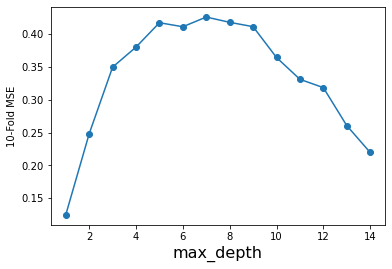

In [45]:
from sklearn.tree import DecisionTreeRegressor


maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10, verbose=1)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [46]:
maxDepthOptimo = grid.best_params_['max_depth'] 
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.5873895343622042
Test:  0.39237369195032645


Aunque no es concluyente, vemos que a la máxima profundidad la diferencia de error entre train y test es superior a 0.18€, a  medida que el árbol aumenta la profundidad el error disminuye.

La importancia de las variables

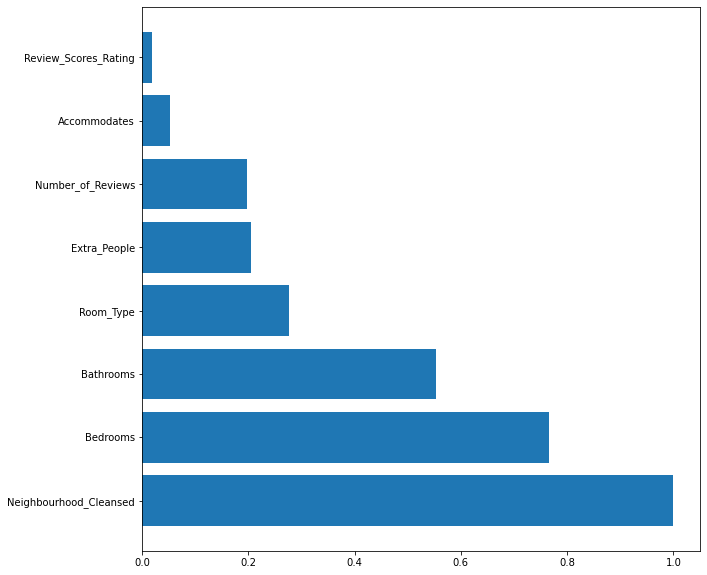

In [47]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

Si observamos el gráfico de importancia, vemos que Bedrooms,  Neighbourhood_Cleansed y Bathrooms son las variables más fuertes

##### Random Forest

Uso árboles de decisión aleatorios:

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END .......................................

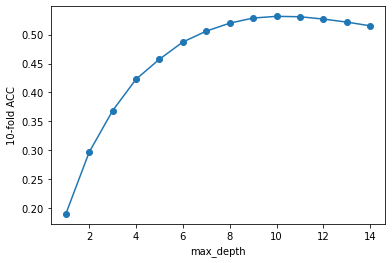

In [48]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [49]:
from sklearn.ensemble import RandomForestRegressor

maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.6921289090823881
Test:  0.47433596808810863


A medida que aumenta la profundidad aumenta la acuracy hasta el punto máx de profundida y a partir de ahí cae un poco la precisión. Según random forest en su máxima profundidad, tenemos una diferencia del error entre train y test de más de 22€

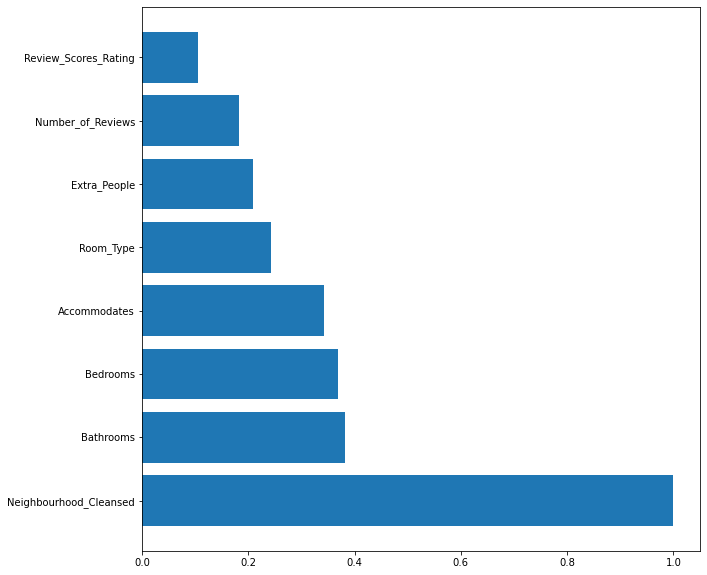

In [50]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

##### Boosted tree

Utilizo Boosting a ver si mejora la precisión de la predicción

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   2.0s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   1.8s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   1.8s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   1.9s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   1.8s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   4.1s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   4.1s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   3.9s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   3.8s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   4.3s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   6.2s
[CV] END ...............learning_rate=0.1, n_esti

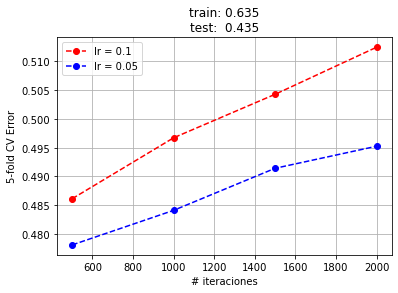

In [52]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

La diferencia del error entre train y test con Boosted tree es de 20. Aquí vemos que con un learning rate alto el error va a aumentando cuando aumenta el valor de las iteraciones. El learning rate estimado perfecto es 0.05 y de hecho la gráfica es mejor.

Importancia de las variables:

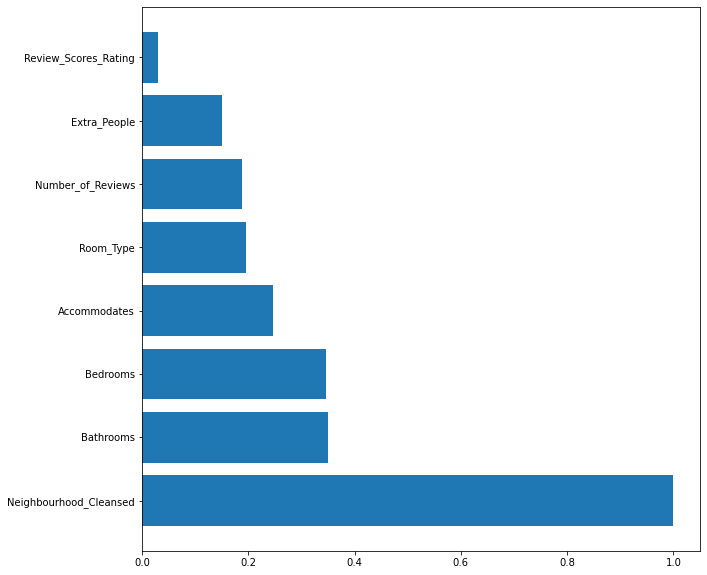

In [53]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

Dependencia:

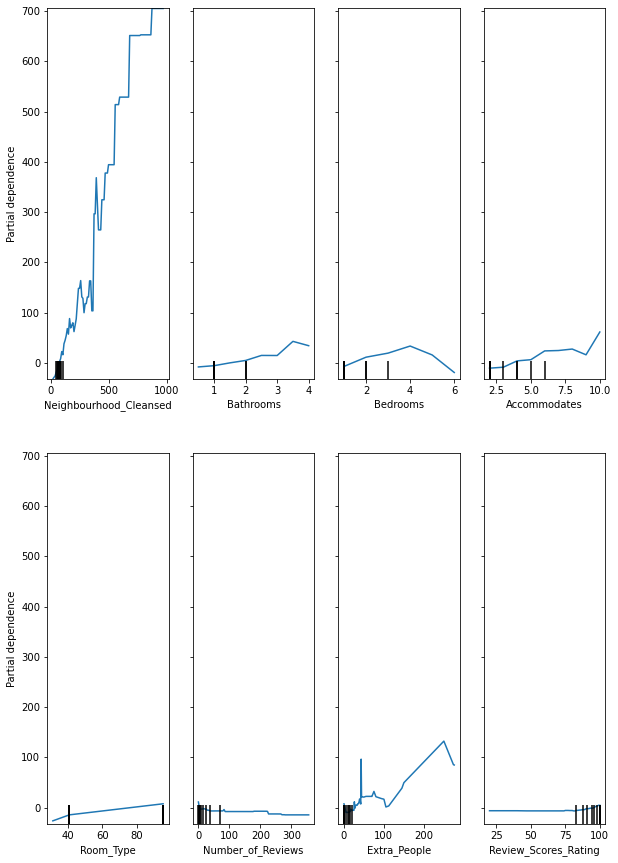

In [54]:
from sklearn.inspection import plot_partial_dependence

importances = bt.feature_importances_
importances = importances / np.max(importances)
indices = np.argsort(importances)[::-1]

plot_partial_dependence(bt, X_train, indices, feature_names=features, percentiles=(0.0, 1.0), n_cols = 4)
fig = plt.gcf()
fig.set_size_inches(10,15)
plt.show()

Con el Parcial dependence plot se puede ver como afecta de cada una de las variables con la variable objetivo. Las más significativas son: Bathrooms y acomodates. A medida que aumenta el precio aumenta la dependencia.

### 5.Conclusiones

Después de analizar y entrenar varios modelos, de los árboles el más preciso es Boosted tree con un error de predicción de 20€, pero aunque tenga un error alto el modelo más preciso es lasso, con un error de predicción de 0.2€.  El precio mínimo predecido nos lo da el árbol individual, pero no es nada preciso ya que solo escoge los mejores predictores, además tiene un error de 22€. 